# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [368]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [369]:
data.shape

(614, 13)

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see there are 614 rows and 13 columns

we will drop Loan_ID as its unique and we cant find duplicates and other requirements such as loan prediction

In [371]:
data = data.drop(columns = 'Loan_ID')

In [372]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see there are multiple null in many features lets fill according to their data if they data is binary or contionus

In [373]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [374]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [375]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [376]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

we can see other than LoanAmount is only continous data so we can use mean for LoanAmount and mode for others 

In [377]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(method = 'bfill')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

Lets check all the nan is filled or not

In [378]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

we can see all the nan values are filled 

# visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

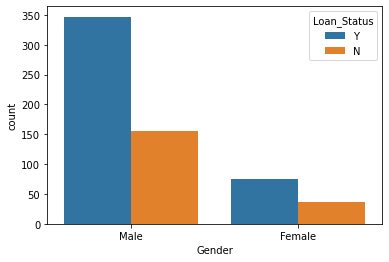

In [379]:
sns.countplot(x = 'Gender',hue = 'Loan_Status',data =data)

we can see Male has more number of approved rates the Female 

<AxesSubplot:xlabel='Married', ylabel='count'>

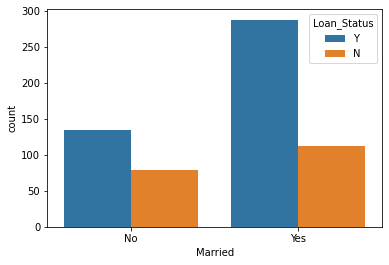

In [380]:
sns.countplot(x = 'Married',hue = 'Loan_Status', data =data)

we can see married people has higest application as well approvals 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

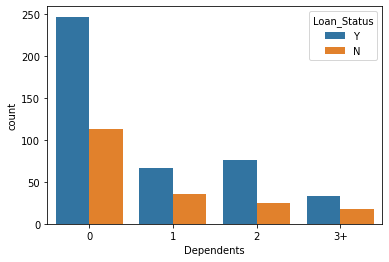

In [381]:
sns.countplot(x = 'Dependents',hue = 'Loan_Status', data =data)

people with 0 dependies has highest application as well approvals 

<AxesSubplot:xlabel='Education', ylabel='count'>

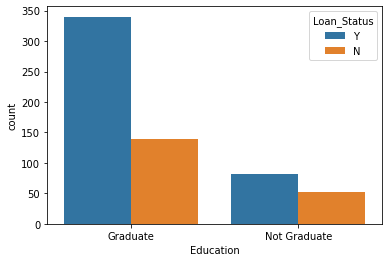

In [382]:
sns.countplot(x = 'Education',hue = 'Loan_Status', data =data)

By above graph we can conclude that graduates had applied for loan more than non-graduates

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

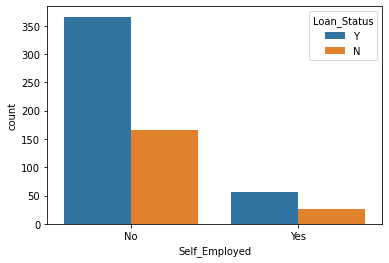

In [383]:
sns.countplot(x = 'Self_Employed',hue = 'Loan_Status', data =data)

people with no self employment has more number of applications

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

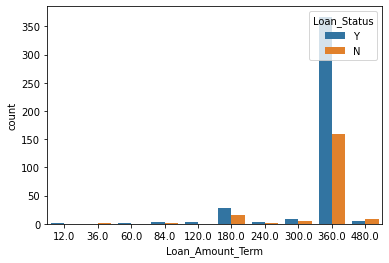

In [384]:
sns.countplot(x = 'Loan_Amount_Term',hue = 'Loan_Status', data =data)

we can see the most popular loan term is 360 months , where as other month has more number of approvals 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

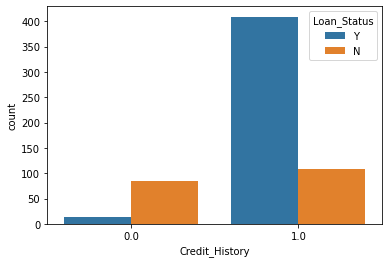

In [385]:
sns.countplot(x = 'Credit_History',hue = 'Loan_Status', data =data)

application with credit history has more number of approvals

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

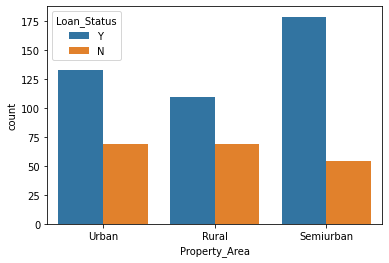

In [386]:
sns.countplot(x = 'Property_Area',hue = 'Loan_Status', data =data)

Semiurban stands first for loan approval then Urban and next comes Rural Property Area

In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [388]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [389]:
ord_enc=OrdinalEncoder(categories=[['Male','Female']])
df1=ord_enc.fit_transform(data[['Gender']])
print(df1)
data['Gender']=df1

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.

In [390]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [391]:
ord_enc=OrdinalEncoder(categories=[['No','Yes']])
df1=ord_enc.fit_transform(data[['Married']])
print(df1)
data['Married']=df1

[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [392]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [393]:
ord_enc=OrdinalEncoder(categories=[['0','1','2','3+']])
df1=ord_enc.fit_transform(data[['Dependents']])
print(df1)
data['Dependents']=df1

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [3.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [0.]
 [3.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [0.]
 [2.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [3.]
 [0.]
 [1.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [3.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [3.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [2.]
 [0.]
 [0.]
 [0.

In [394]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [395]:
ord_enc=OrdinalEncoder(categories=[['Graduate','Not Graduate']])
df1=ord_enc.fit_transform(data[['Education']])
print(df1)
data['Education']=df1

[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [396]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [397]:
ord_enc=OrdinalEncoder(categories=[['No','Yes']])
df1=ord_enc.fit_transform(data[['Self_Employed']])
print(df1)
data['Self_Employed']=df1

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [398]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [399]:
ord_enc=OrdinalEncoder(categories=[['Urban', 'Rural', 'Semiurban']])
df1=ord_enc.fit_transform(data[['Property_Area']])
print(df1)
data['Property_Area']=df1

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.]
 [1.

In [400]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [401]:
ord_enc=OrdinalEncoder(categories=[['Y', 'N']])
df1=ord_enc.fit_transform(data[['Loan_Status']])
print(df1)
data['Loan_Status']=df1

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.

In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


We can see everthing changed to float just ApplicationIncome is left

In [403]:
data['ApplicantIncome'] = data['ApplicantIncome'].astype(float)

In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


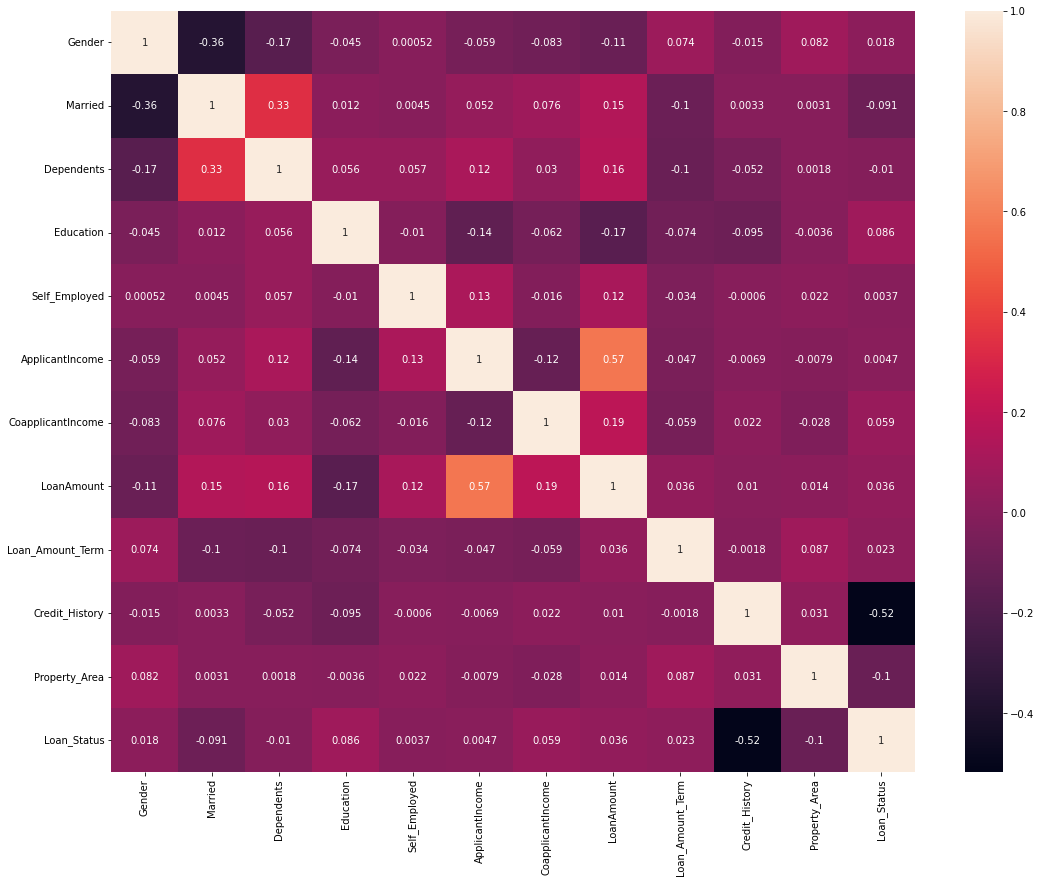

In [405]:
data_corr=data.corr()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

<Figure size 360x720 with 0 Axes>

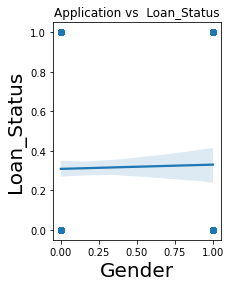

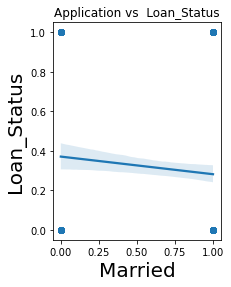

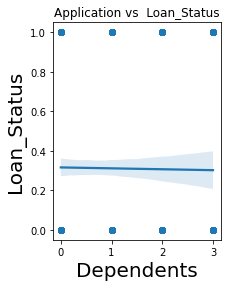

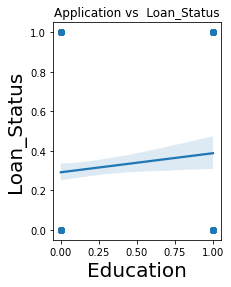

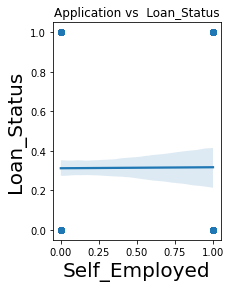

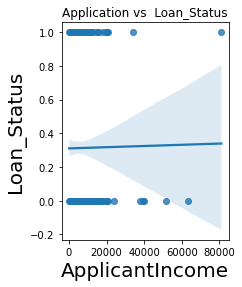

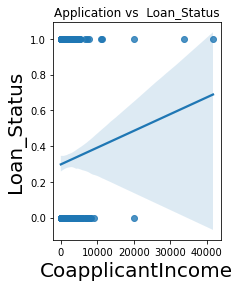

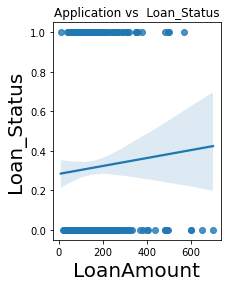

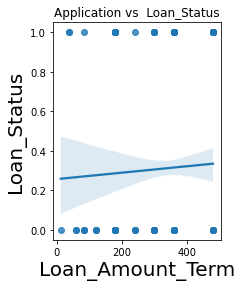

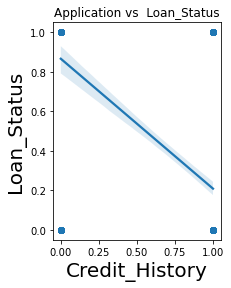

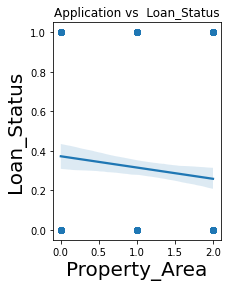

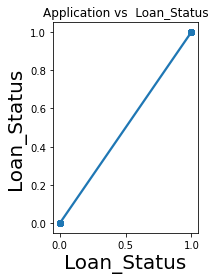

In [406]:
plt.figure(figsize = (5,10), facecolor = 'blue')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        plt.figure(figsize = (3,4))
        sns.regplot(data[column], data['Loan_Status'])
        plt.title('Application vs  Loan_Status')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Loan_Status',fontsize=20)
        
plt.tight_layout()

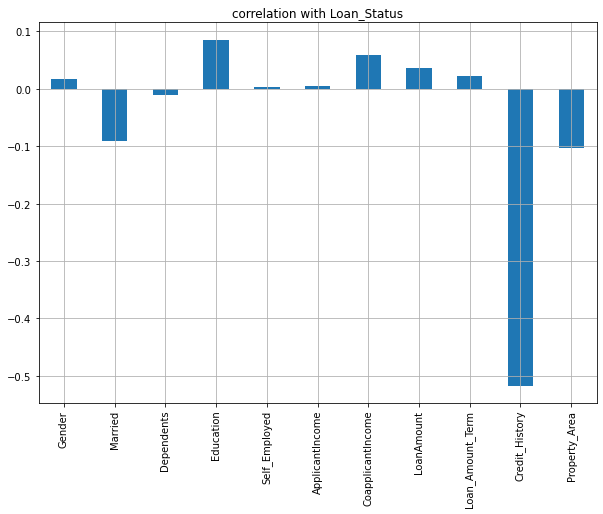

In [407]:
data.drop('Loan_Status',axis=1).corrwith(data.Loan_Status).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with Loan_Status')
plt.show()

We see Credit History plays the most role for loan approval 

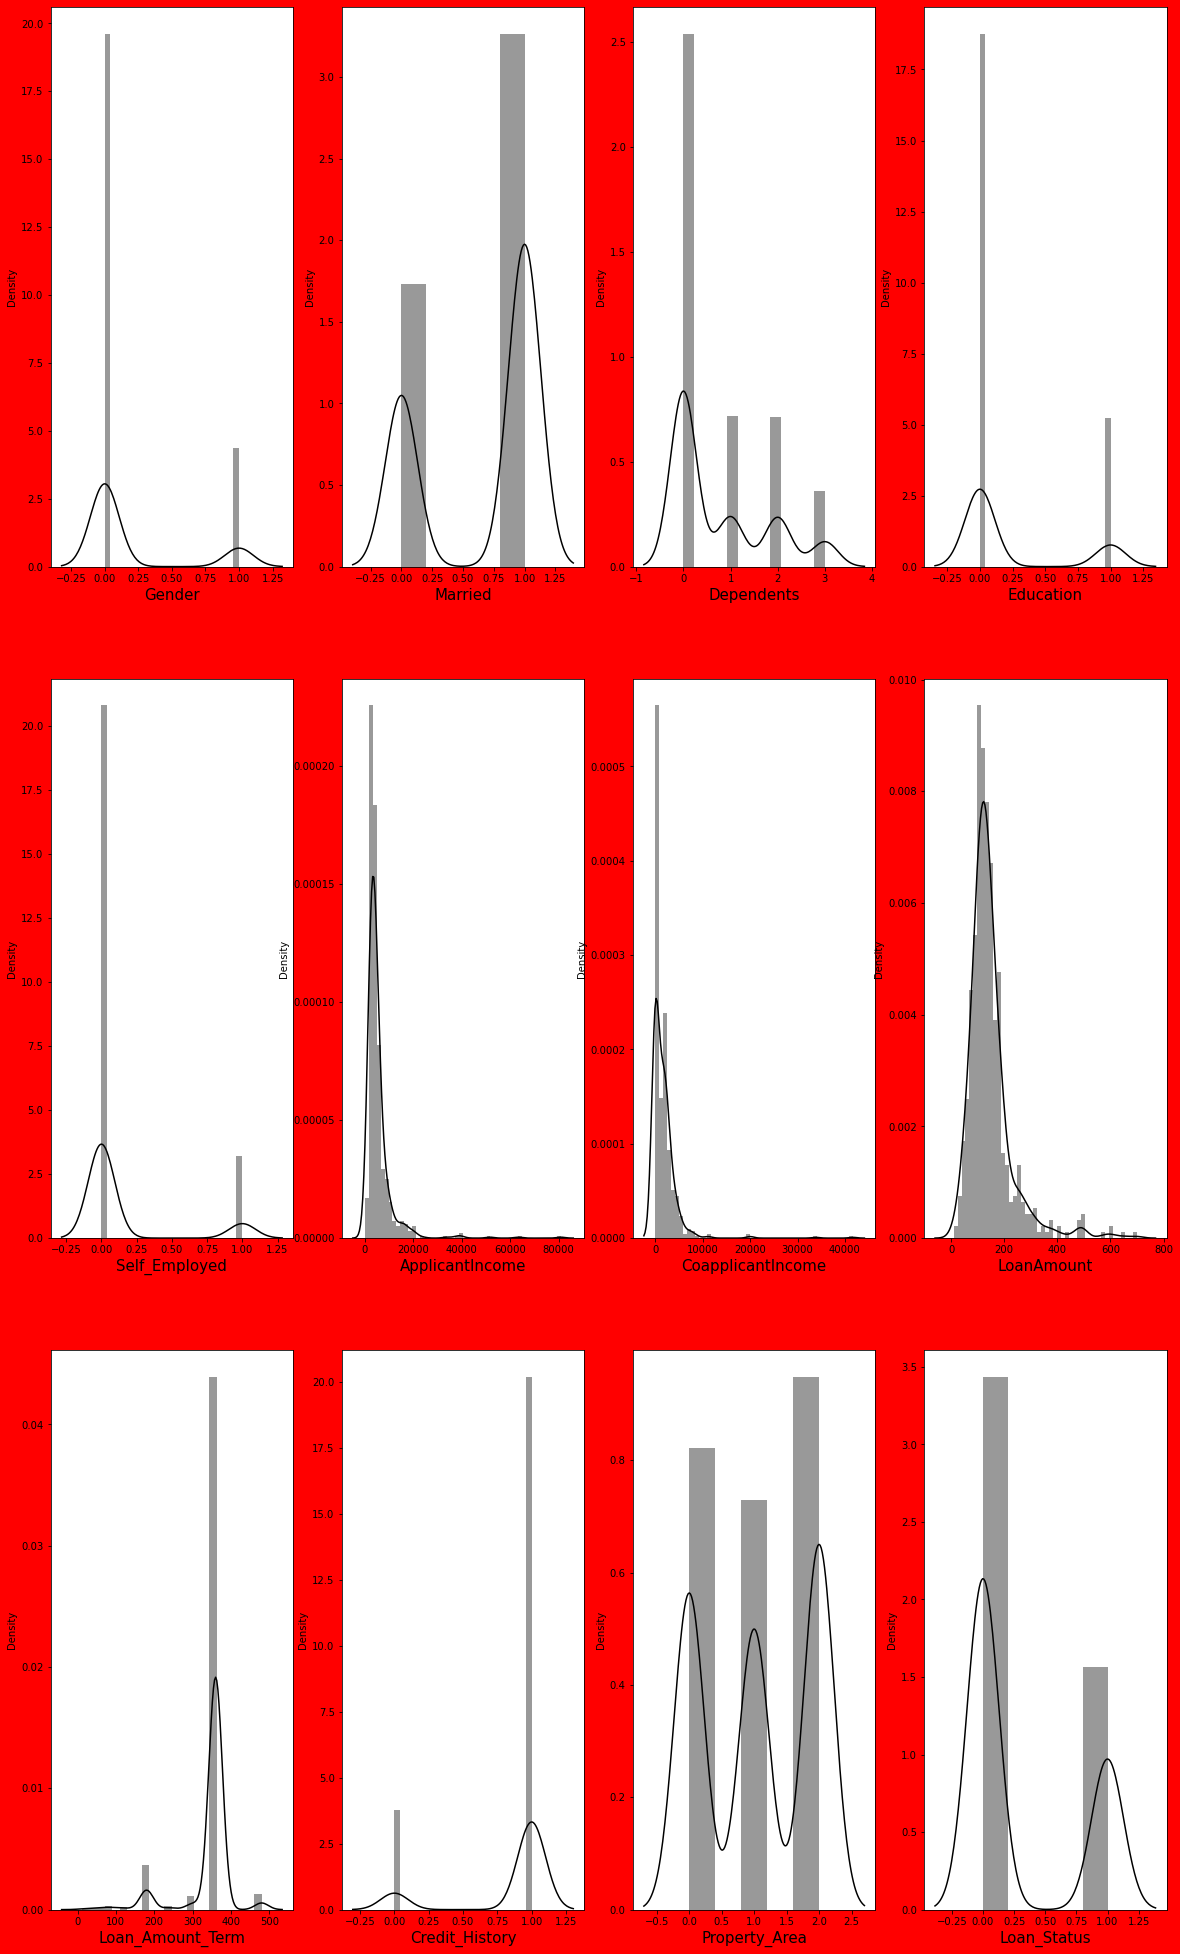

In [408]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

We gonna check skewness only on continous data i.e ApplicantIncom,CoapplicantIncome,Loan_Amount

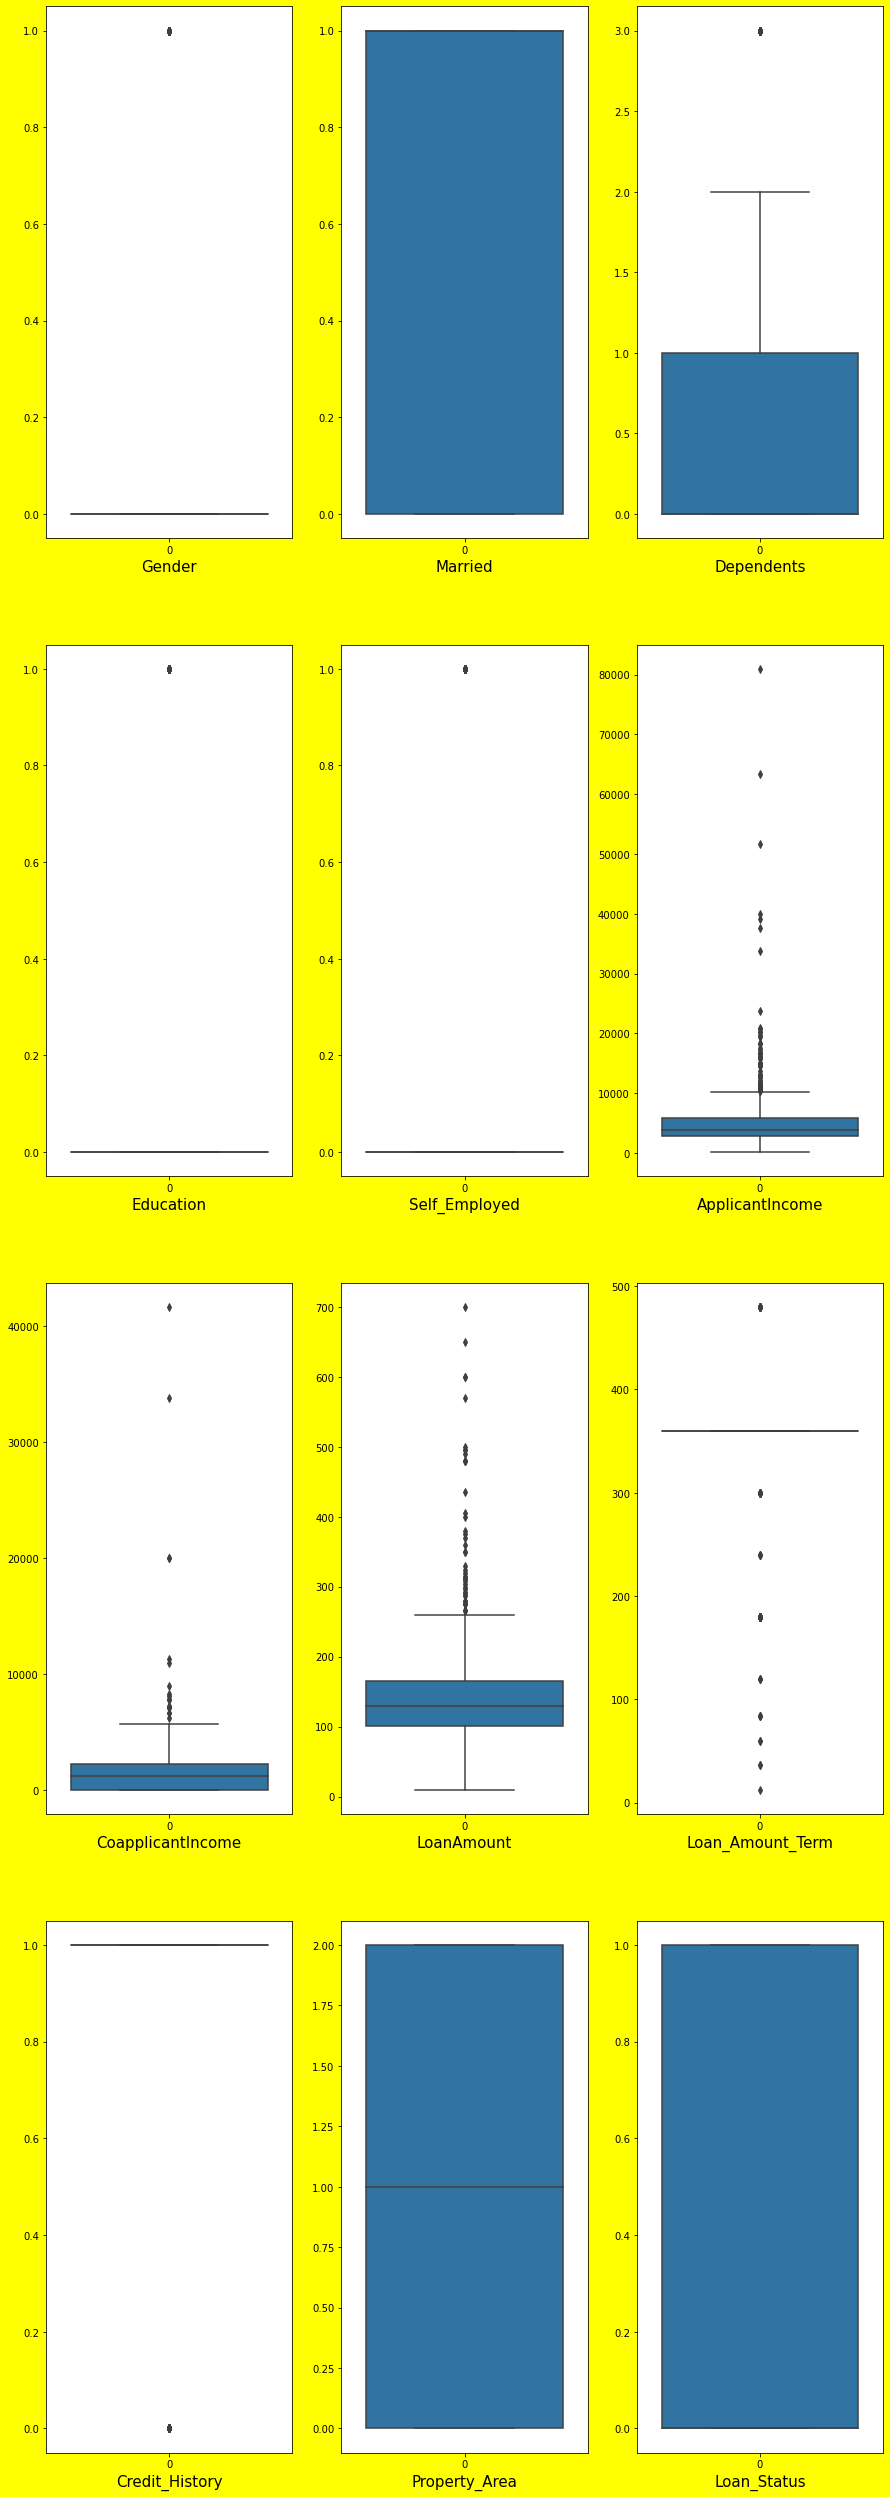

In [409]:
plt.figure(figsize=(15,45),facecolor='yellow')
graph=1
for column in data:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [410]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

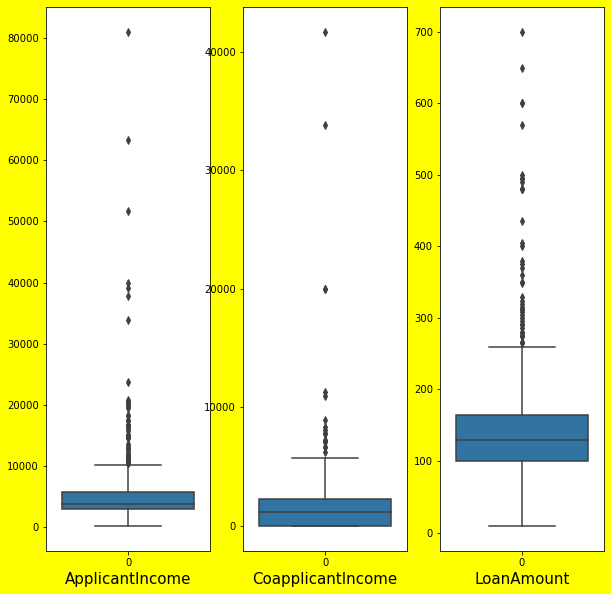

In [411]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1
for column in data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    if graph<=3:
        plt.subplot(1,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

as 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are continous data so we gonna remove outliers using Z score 

# ZSCORE

In [412]:
from scipy.stats import zscore
z_score= zscore(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<2).all(axis=1)
data=data[filtering_entry]
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.185442,0.648180,0.717504,0.230503,0.126516,4566.169844,1336.252894,132.761968,342.322357,0.840555,1.053726,0.308492
std,0.388993,0.477952,0.992116,0.421520,0.332719,2804.732389,1514.327508,52.270163,64.976599,0.366409,0.840939,0.462272
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3717.000000,1131.000000,127.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5417.000000,2209.000000,158.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,17263.000000,7250.000000,312.000000,480.000000,1.000000,2.000000,1.000000


In [413]:
print('The data loss Percentage for removing outlier using the IQR is ', 100-((577/614)*100))

The data loss Percentage for removing outlier using the IQR is  6.026058631921828


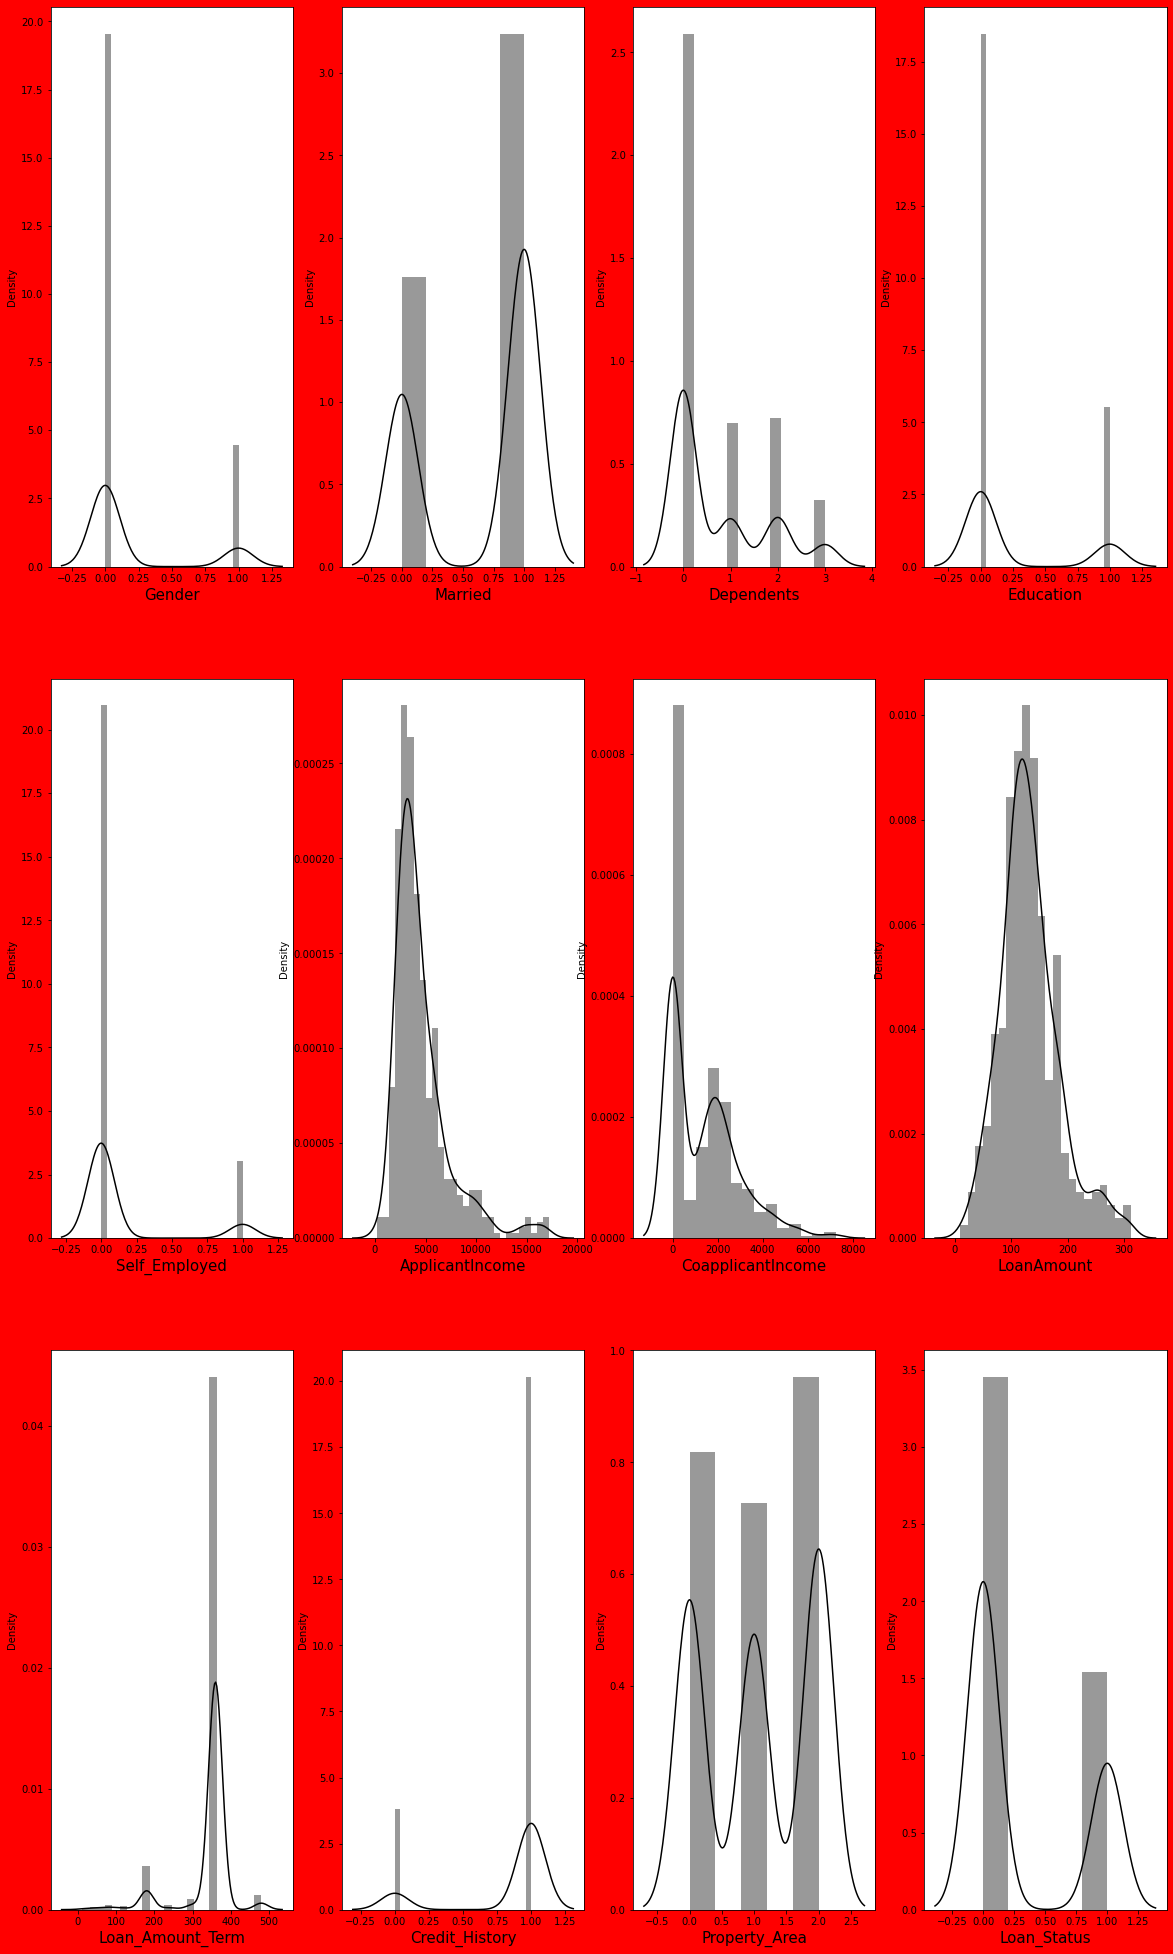

In [414]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

In [419]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    float64
 1   Married            577 non-null    float64
 2   Dependents         577 non-null    float64
 3   Education          577 non-null    float64
 4   Self_Employed      577 non-null    float64
 5   ApplicantIncome    577 non-null    float64
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    float64
 11  Loan_Status        577 non-null    float64
dtypes: float64(12)
memory usage: 58.6 KB


In [418]:
scaler=StandardScaler()

In [420]:
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [422]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.210911,Gender
1,1.342050,Married
2,1.196492,Dependents
3,1.067540,Education
4,1.069012,Self_Employed
5,1.680612,ApplicantIncome
6,1.428662,CoapplicantIncome
7,1.597755,LoanAmount
8,1.054661,Loan_Amount_Term
9,1.016166,Credit_History


we dont see any feature is multi corelated with others 

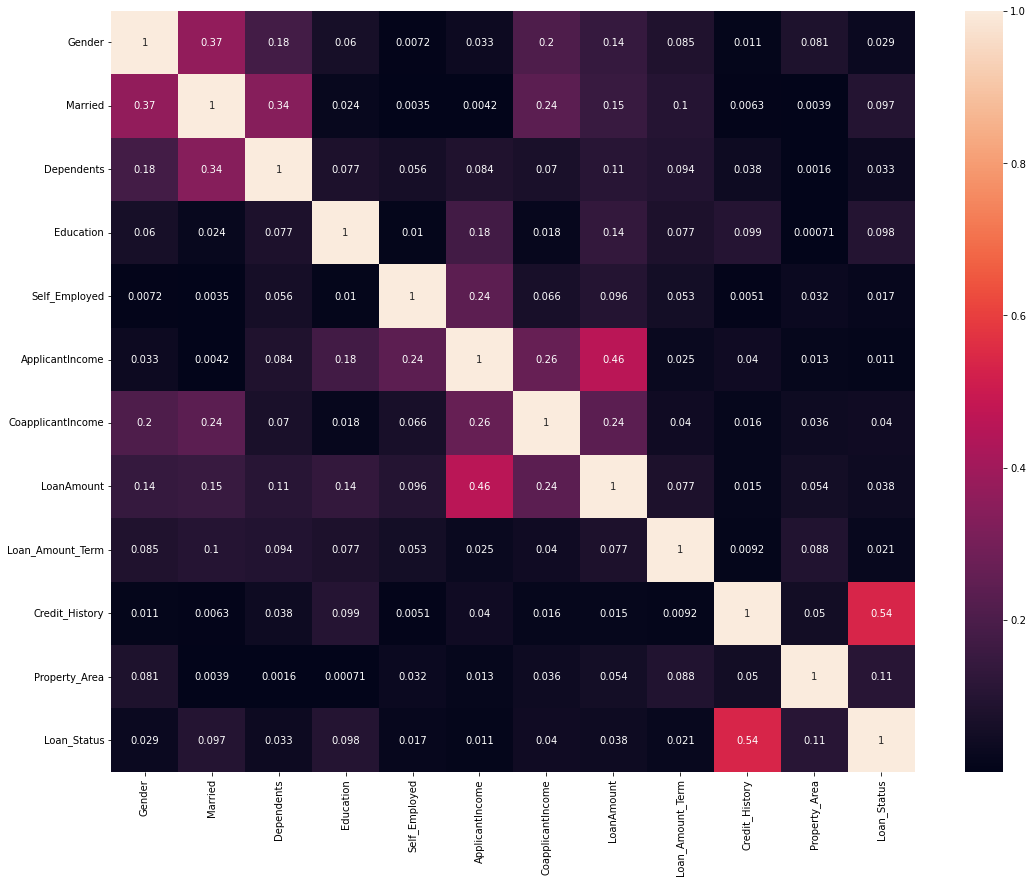

In [423]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

Lets check the data is balanced or not 

In [424]:
y.value_counts()

0.0    399
1.0    178
Name: Loan_Status, dtype: int64

as the data is not balanced lets balance using SMOTE

In [430]:
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [431]:
y.value_counts()

0.0    399
1.0    399
Name: Loan_Status, dtype: int64

now both are similar

In [434]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=355)

In [435]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n===============Train Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===============Test Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [440]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score 
svc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :80.10%

===============Test Reasult=============
Accuracy SCore :76.00%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.67      0.95      0.79        93
         1.0       0.93      0.60      0.73       107

    accuracy                           0.76       200
   macro avg       0.80      0.77      0.76       200
weighted avg       0.81      0.76      0.75       200



In [449]:
SVC_CVS=cross_val_score(svc,x,y,cv=10).mean()
SVC_CVS

0.7581962025316457

In [446]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()
#gbdt model training and printing train and test score 
gbdt.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :90.13%

===============Test Reasult=============
Accuracy SCore :81.50%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        93
         1.0       0.90      0.74      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.83      0.81      0.81       200



In [451]:
gbdt_csv=cross_val_score(gbdt,x,y,cv=10).mean()
gbdt_csv

0.8084018987341773

In [452]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lr model training and printing train and test score 
lr.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :75.25%

===============Test Reasult=============
Accuracy SCore :71.00%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.63      0.90      0.74        93
         1.0       0.87      0.54      0.67       107

    accuracy                           0.71       200
   macro avg       0.75      0.72      0.71       200
weighted avg       0.76      0.71      0.70       200



In [453]:
lr_CSV=cross_val_score(lr,x,y,cv=10).mean()
lr_CSV

0.7418037974683545

In [454]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
#DTC model training and printing train and test score 
DTC.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(DTC,x_train,x_test,y_train,y_test,train=True)
print_score(DTC,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :78.50%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.78      0.74      0.76        93
         1.0       0.79      0.82      0.80       107

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.79      0.78       200



In [456]:
DTC_csv=cross_val_score(DTC,x,y,cv=10).mean()
DTC_csv

0.7783069620253165

In [457]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn model training and printing train and test score 
knn.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :83.61%

===============Test Reasult=============
Accuracy SCore :77.50%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.77      0.73      0.75        93
         1.0       0.78      0.81      0.79       107

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200



In [458]:
knn_csv=cross_val_score(knn,x,y,cv=10).mean()
knn_csv

0.7719620253164557

In [460]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#knn model training and printing train and test score 
rfc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :88.50%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.88        93
         1.0       0.95      0.83      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



In [464]:
rfc_csv=cross_val_score(rfc,x,y,cv=15).mean()
rfc_csv

0.8412997903563941

In [465]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt_clf=GradientBoostingClassifier()
#gbdt_clf model training and printing train and test score 
gbdt_clf.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)



===============Train Reasult=============
Accuracy SCore :90.13%

===============Test Reasult=============
Accuracy SCore :81.50%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        93
         1.0       0.90      0.74      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.83      0.81      0.81       200



In [467]:
gbdt_clf_csv=cross_val_score(gbdt_clf,x,y,cv=5).mean()
gbdt_clf_csv

0.7921305031446539

In [468]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('lr_CSV --> ',lr_CSV)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)
print('gbdt_clf_csv --> ',gbdt_clf_csv)

********* Cross Validation Score*********
knn_csv -->  0.7719620253164557
DTC_csv -->  0.7783069620253165
lr_CSV -->  0.7418037974683545
SVC_CVS -->  0.7581962025316457
rfc_csv -->  0.8412997903563941
gbdt_clf_csv -->  0.7921305031446539


# As per the Cross Validation Score Random Forest Classifier is the best model 

In [469]:
params ={'n_estimators':[100,150,200,250],
        'criterion':['gini','entropy'],
        'max_depth':[13,15,16,17],
        'min_samples_split':[2,3,4,5,6],
        'bootstrap':[True,False],
        'n_jobs':[-1,-2,-3]}

In [470]:
from sklearn.model_selection import GridSearchCV

In [471]:
gcv = GridSearchCV(RandomForestClassifier(), params, cv = 5, n_jobs =-1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [13, 15, 16, 17],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250],
                         'n_jobs': [-1, -2, -3]})

In [472]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 13,
 'min_samples_split': 2,
 'n_estimators': 150,
 'n_jobs': -3}

In [478]:
rfc_clf=RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = 17, min_samples_split = 2,
                                n_estimators = 200, n_jobs = -3) 
rfc_clf.fit(x_train,y_train)
pred=rfc_clf.predict(x_train)

In [479]:
rfc_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{rfc_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=rfc_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")
print('Cross validation --> ',rfc_clf_report)


==================Train Result=============
Accuracy Score:100.00%
-----------------------------------------
Classification Report:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    306.0  292.0       1.0      598.0         598.0
----------------------------------
confusion matrix:
[[306   0]
 [  0 292]]

***********test results***********
Accuracy Score:85.50%
-----------------------------------------
Classification Report:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.807692    0.906250     0.855    0.856971      0.860421
recall      0.903226    0.813084     0.855    0.858155      0.855000
f1-score    0.852792    0.857143     0.855    0.854967      0.855120
support    93.000000  107.000000     0.855  200.000000    200.000000
----------------------------

In [480]:
print('rfc_csv --> ',rfc_csv)

rfc_csv -->  0.8412997903563941


In [481]:
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')

Accuracy Score:85.50%


# after tunning we have increased score by 1 %

In [482]:
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve

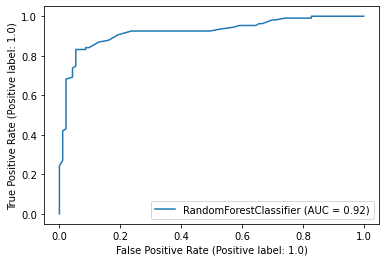

In [487]:
disp=plot_roc_curve(rfc,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [488]:
auc_score = roc_auc_score(y_test,y_test)
print(auc_score)

1.0


In [489]:
import pickle

In [490]:
pickle.dump(rfc_csv,open('Loan_Application','wb'))